<a href="https://colab.research.google.com/github/darthfelipe21/LangGraph/blob/main/MultiAgentsLangGraphToolbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building your agent's toolbox

As you've seen, ***agents*** use ***tools*** to trigger certain actions. That could be executing some code, retrieving a local file, running a web search, or performing a math calculation.

As you progress through this course, you'll build a multi-agent system that can compile financial information, including summaries, stock performance data, and accompanying visualizations of Fortune 500 companies.

Let's start with a single-agent implementation to refresh ourselves on the LangGraph syntax and to create the tools we'll need for the multi-agent case.

In total, there are three tools required:

1. A tool for retrieving company information from the internet &rarr; Wikipedia
2. A tool for retrieving stock performance information from a local CSV file
3. A tool for running Python code to generate the visualizations

Let's start building these tools for your agents to use, beginning with a Wikipedia search tool!

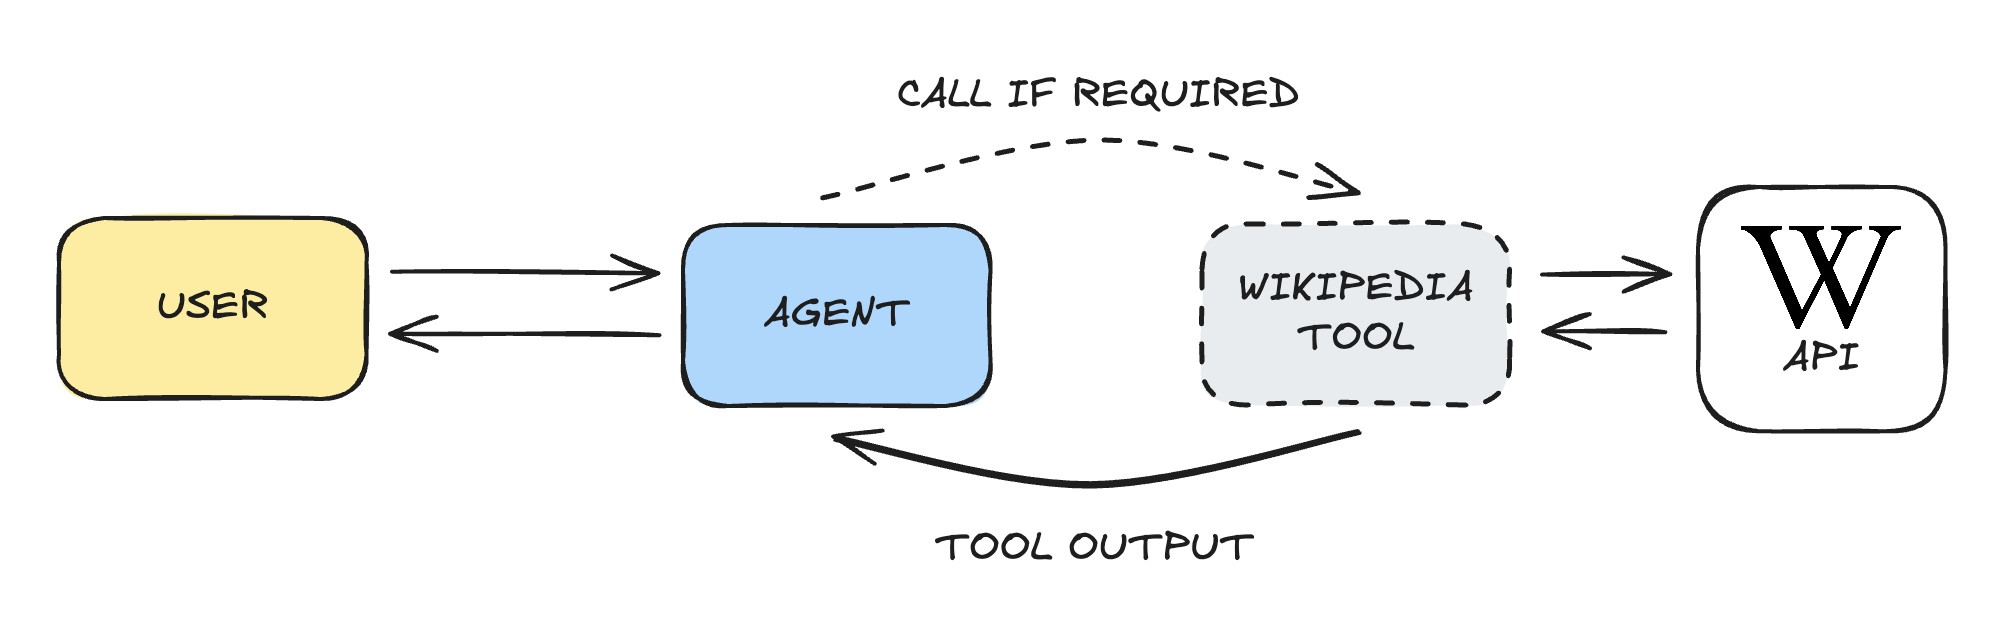


### 🔎 Tool 1: Wikipedia search

You'll use the `wikipedia` Python library to perform Wikipedia searches and return informative summaries about different companies. This tool calls Wikipedia's API in the backend, which doesn't require an API key.

This library has two functions that we'll use to search and summarize company information:

1. `wikipedia.search()`: Search Wikipedia to return the highest-ranking page titles.
2. `wikipedia.summary()`: Fetch a summary from a given page. The `sentences` argument can be used to control the amount of information (number of sentences) returned.

In [ ]:
!pip install --quiet wikipedia==1.4.0 langchain-core==0.3.59

In [ ]:
from typing import Annotated
import wikipedia
from langchain_core.tools import tool

@tool
def wikipedia_tool(
    query: Annotated[str, "The Wikipedia search to execute to find key summary information."],
):
    """Use this to search Wikipedia for factual information."""
    try:
        # Step 1: Search using query
        results = wikipedia.search(query)

        if not results:
            return "No results found on Wikipedia."

        # Step 2: Retrieve page title
        title = results[0]

        # Step 3: Fetch summary
        summary = wikipedia.summary(title, sentences=8, auto_suggest=False, redirect=True)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    return f"Successfully executed:\nWikipedia summary: {summary}"

Tools, like many other LangChain entities, can be called using the `.invoke()` method, passing it the input (if there's only one) or a dictionary mapping the inputs if there are multiple.

**Invoke your `wikipedia_tool()` on the `company_name` variable.**

In [ ]:
# Test with Apple query
company_name = "Apple Inc."
wiki_summary = wikipedia_tool.invoke(f"{company_name}")
print(wiki_summary)